In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, layers, Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler

from sklearn.utils.class_weight import compute_class_weight

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/spaceship Titanic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/spaceship Titanic/test.csv')

In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<h1> DATA DICTIONARY</h1>

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [4]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<h1>Missing Values</h1>
Before doing an Exploratory data analysis to make more sense of the data. we will check for missing values and do some data cleaning.
From the table missing value table below the highest percentage of missing data is 2%. we can proceed to replace missing value by using forward fill. This will use the last valid values.

In [5]:
missing_values = train_df.isna().sum().to_frame()
missing_values = missing_values.rename(columns= {0: 'missing_values'})
missing_values['% of total'] = (missing_values['missing_values'] / train_df.shape[0]).round(2)
missing_values

,missing_values,% of total
PassengerId,0,0.00
HomePlanet,201,0.02
CryoSleep,217,0.02
Cabin,199,0.02
Destination,182,0.02
Age,179,0.02
VIP,203,0.02
RoomService,181,0.02
FoodCourt,183,0.02
ShoppingMall,208,0.02


In [6]:
missing_values_test = test_df.isna().sum().to_frame()
missing_values_test = missing_values_test.rename(columns= {0: 'missing_values_test'})
missing_values_test['% of total'] = (missing_values_test['missing_values_test'] / train_df.shape[0]).round(2)
missing_values_test

,missing_values_test,% of total
PassengerId,0,0.00
HomePlanet,87,0.01
CryoSleep,93,0.01
Cabin,100,0.01
Destination,92,0.01
Age,91,0.01
VIP,93,0.01
RoomService,82,0.01
FoodCourt,106,0.01
ShoppingMall,98,0.01


In [7]:
test_df.fillna(method='ffill', inplace=True)

In [8]:
train_df.fillna(method='ffill', inplace=True)

In [9]:
missing_values = train_df.isna().sum().to_frame()
missing_values = missing_values.rename(columns= {0: 'missing_values'})
missing_values['% of total'] = (missing_values['missing_values'] / train_df.shape[0]).round(2)
missing_values

,missing_values,% of total
PassengerId,0,0.0
HomePlanet,0,0.0
CryoSleep,0,0.0
Cabin,0,0.0
Destination,0,0.0
Age,0,0.0
VIP,0,0.0
RoomService,0,0.0
FoodCourt,0,0.0
ShoppingMall,0,0.0


<h1>EDA</h1>

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Cabin         4277 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   bool   
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4277 non-null   object 
dtypes: bool(2), float64(6), object(5)
memory usage: 376.0+ KB


In [12]:
destination = train_df['Destination'].value_counts().to_dict()

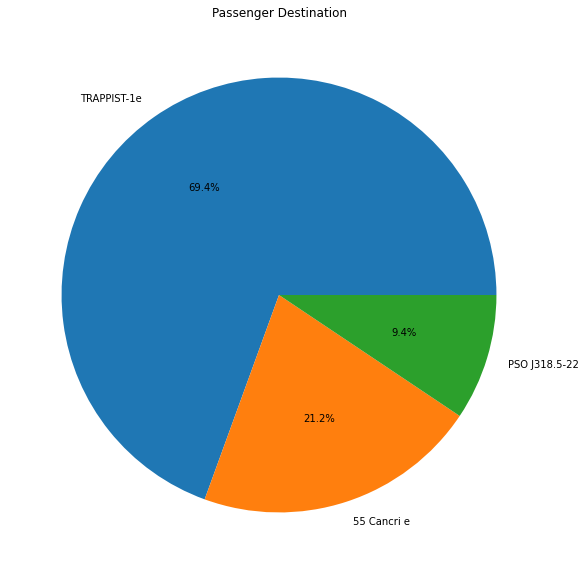

In [13]:
fig = plt.figure(figsize=(10,10))
plt.pie(destination.values(), labels=destination.keys(), autopct='%1.1f%%')
plt.title('Passenger Destination')
plt.show()

In [14]:
Cryosleep = train_df['CryoSleep'].value_counts().to_dict()
Cryosleep

{False: 5582, True: 3111}

In [15]:
fig = plt.figure(figsize=(10,10))
px.bar(x=Cryosleep.keys(), y=Cryosleep.values(), title='Passangers in Cryosleep')

<Figure size 720x720 with 0 Axes>

In [16]:
home_planet = train_df['HomePlanet'].value_counts().to_dict()
home_planet

{'Earth': 4720, 'Europa': 2177, 'Mars': 1796}

In [17]:
fig = plt.figure(figsize=(10,10))
px.bar(x=home_planet.keys(), y=home_planet.values(), title='Passangers Homeplanet')


<Figure size 720x720 with 0 Axes>

In [18]:
transported = train_df['Transported'].value_counts().to_dict()
transported

{True: 4378, False: 4315}

In [19]:
fig = plt.figure(figsize=(10,10))
px.bar(x=transported.keys(), y=transported.values(), title='Transported Passangers ')

<Figure size 720x720 with 0 Axes>

In [20]:
transported_df = train_df.groupby(train_df['Transported']).agg('mean')
transported_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,,,
False,0.137659,29.898262,0.028737,385.523059,384.841947,165.848667,559.40927,541.252607
True,0.574920,27.746231,0.018273,65.513933,533.131795,178.020786,66.22042,70.701005


To get insight from the cabin column. it needs to split into deck and sides this can be easily done by spliting the string through the '/'

In [21]:
train_df['Cabin'].value_counts()

G/734/S     8
G/109/P     8
F/1194/P    8
C/21/P      7
B/11/S      7
           ..
F/648/S     1
F/708/P     1
F/647/S     1
G/565/P     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [22]:
Cabin_split = train_df['Cabin'].str.split('/',expand = True)

Cabin_split_test = test_df['Cabin'].str.split('/',expand = True)
Cabin_split

,0,1,2
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
...,...,...,...
8688,A,98,P
8689,G,1499,S
8690,G,1500,S
8691,E,608,S


In [23]:
train_df["cabin_deck"] = Cabin_split[0]
train_df["cabin_side"] = Cabin_split[2]

test_df["cabin_deck"] = Cabin_split_test[0]
test_df["cabin_side"] = Cabin_split_test[2]

In [24]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


In [25]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,cabin_deck,cabin_side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,S


In [26]:
#create dummy variable for columns strings columns
new_train_df = pd.get_dummies(columns=['HomePlanet', 'Destination', 'cabin_deck', 'cabin_side'], data=train_df)

new_test_df = pd.get_dummies(columns=['HomePlanet', 'Destination', 'cabin_deck', 'cabin_side'], data=test_df)

In [27]:
#replace all true and false in dataset with 0 and 1
col = ['CryoSleep', 'VIP', 'Transported' ]
test_col = ['CryoSleep', 'VIP' ]

for i in col:
  new_train_df[i].replace([False, True], [0, 1], inplace=True)

for j in test_col:
  new_test_df[j].replace([False, True], [0, 1], inplace=True)


In [28]:
new_train_df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,cabin_deck_A,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T,cabin_side_P,cabin_side_S
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,...,0,0,0,0,0,1,0,0,0,1
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,...,1,0,0,0,0,0,0,0,0,1
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,...,1,0,0,0,0,0,0,0,0,1
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,...,0,0,0,0,0,1,0,0,0,1


In [29]:
new_test_df

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,cabin_deck_A,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T,cabin_side_P,cabin_side_S
0,0013_01,1,G/3/S,27.0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
1,0018_01,0,F/4/S,19.0,0,0.0,9.0,0.0,2823.0,0.0,...,0,0,0,0,0,1,0,0,0,1
2,0019_01,1,C/0/S,31.0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
3,0021_01,0,C/1/S,38.0,0,0.0,6652.0,0.0,181.0,585.0,...,0,0,1,0,0,0,0,0,0,1
4,0023_01,0,F/5/S,20.0,0,10.0,0.0,635.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,G/1496/S,34.0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
4273,9269_01,0,G/1496/S,42.0,0,0.0,847.0,17.0,10.0,144.0,...,0,0,0,0,0,0,1,0,0,1
4274,9271_01,1,D/296/P,42.0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4275,9273_01,0,D/297/P,42.0,0,0.0,2680.0,0.0,0.0,523.0,...,0,0,0,1,0,0,0,0,1,0


In [30]:
new_train_df.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,cabin_deck_A,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T,cabin_side_P,cabin_side_S
CryoSleep,1.000000,-0.068900,-0.074514,-0.241265,-0.201298,-0.207447,-0.193623,-0.189925,0.456062,-0.112321,...,-0.026744,0.128149,0.025922,-0.066463,-0.107293,-0.218782,0.242092,-0.017909,-0.017731,0.017731
Age,-0.068900,1.000000,0.090322,0.066179,0.125384,0.031320,0.121479,0.098442,-0.074233,-0.199976,...,0.072777,0.106868,0.124814,0.078181,0.024379,-0.018293,-0.208895,0.013548,-0.009412,0.009412
VIP,-0.074514,0.090322,1.000000,0.053430,0.123900,0.017174,0.057860,0.120018,-0.034560,-0.159813,...,0.131295,0.066019,0.064605,0.068264,-0.015113,-0.056366,-0.097023,-0.003719,0.008651,-0.008651
RoomService,-0.241265,0.066179,0.053430,1.000000,-0.016172,0.051853,0.010330,-0.018473,-0.241271,-0.137505,...,-0.020825,-0.058974,-0.018233,0.165743,0.044852,0.086845,-0.145467,0.007338,0.011954,-0.011954
FoodCourt,-0.201298,0.125384,0.123900,-0.016172,1.000000,-0.014892,0.215444,0.220135,0.046016,-0.213674,...,0.117020,0.152098,0.255945,0.020286,-0.041797,-0.131046,-0.146869,0.013964,-0.021349,0.021349
ShoppingMall,-0.207447,0.031320,0.017174,0.051853,-0.014892,1.000000,0.013021,-0.007986,0.010163,-0.070970,...,-0.019571,-0.013228,-0.000801,0.054895,0.030943,0.074699,-0.107761,-0.006737,0.021190,-0.021190
Spa,-0.193623,0.121479,0.057860,0.010330,0.215444,0.013021,1.000000,0.145340,-0.217188,-0.156715,...,0.056790,0.121894,0.162376,0.033519,-0.008914,-0.085457,-0.123672,0.035865,-0.006873,0.006873
VRDeck,-0.189925,0.098442,0.120018,-0.018473,0.220135,-0.007986,0.145340,1.000000,-0.204798,-0.154552,...,0.098472,0.117315,0.202449,-0.002626,-0.020295,-0.091901,-0.127693,0.012085,0.008116,-0.008116
Transported,0.456062,-0.074233,-0.034560,-0.241271,0.046016,0.010163,-0.217188,-0.204798,1.000000,-0.172322,...,-0.001288,0.144290,0.107454,-0.034341,-0.096621,-0.090116,0.017279,-0.014568,-0.103142,0.103142
HomePlanet_Earth,-0.112321,-0.199976,-0.159813,-0.137505,-0.213674,-0.070970,-0.156715,-0.154552,-0.172322,1.000000,...,-0.185605,-0.338948,-0.331812,-0.259919,-0.050891,0.068975,0.581973,-0.016516,0.017559,-0.017559


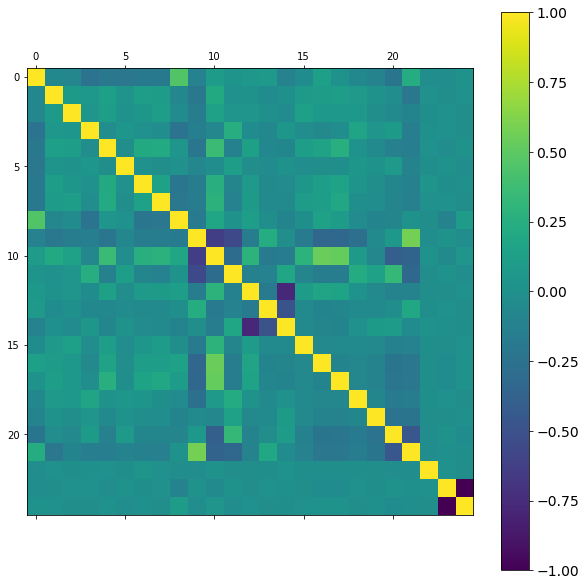

In [31]:
#plot correlation matrix
f=plt.figure(figsize=(10, 10))
plt.matshow(new_train_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

In [32]:
cor = new_train_df.corr().unstack().sort_values().drop_duplicates()
cor1 = pd.DataFrame(cor, columns=['correlation'])


In [33]:
cor1.head(10)

correlation
cabin_side_P              cabin_side_S               -1.000000
Destination_55 Cancri e   Destination_TRAPPIST-1e    -0.781205
HomePlanet_Earth          HomePlanet_Europa          -0.630014
HomePlanet_Mars           HomePlanet_Earth           -0.556205
Destination_PSO J318.5-22 Destination_TRAPPIST-1e    -0.485245
cabin_deck_F              cabin_deck_G               -0.459118
                          HomePlanet_Europa          -0.392054
HomePlanet_Europa         cabin_deck_G               -0.366398
cabin_deck_B              HomePlanet_Earth           -0.338948
cabin_deck_C              HomePlanet_Earth           -0.331812

In [34]:
cor1.tail(10)

correlation
VRDeck            HomePlanet_Europa           0.282438
HomePlanet_Europa Destination_55 Cancri e     0.291326
                  cabin_deck_A                0.296582
cabin_deck_F      HomePlanet_Mars             0.334682
FoodCourt         HomePlanet_Europa           0.359817
Transported       CryoSleep                   0.456062
HomePlanet_Europa cabin_deck_C                0.527653
                  cabin_deck_B                0.539088
HomePlanet_Earth  cabin_deck_G                0.581973
CryoSleep         CryoSleep                   1.000000

In [35]:
x = new_train_df.drop(columns=['PassengerId', 'Cabin', 'Name', 'Transported', ])
y = new_train_df['Transported']

x_test = new_test_df.drop(columns=['PassengerId', 'Cabin', 'Name'])

In [36]:
#scale the dataset
scale = StandardScaler()
scale.fit(x)

x_train = scale.transform(x)
y_train = y

x_test_scaled = scale.transform(x_test)

In [37]:
x_test_scaled.shape

(4277, 24)

In [38]:
x_train.shape

(8693, 24)

In [39]:
#compute class weight to correct imbalance during training

weight = compute_class_weight('balanced', classes = np.unique(y_train), y=y_train)
class_weight = {0: weight[0],
                1: weight[1]
                }
print(class_weight)

{0: 1.0073001158748551, 1: 0.9928049337597076}


In [97]:
#create a simple sequential model with 2 dense layer

model = Sequential(layers=[
    layers.Input(shape=(24,), dtype='float32'),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(1, activation='sigmoid')
]
)

In [98]:
EPOCHS = 200
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

metrics = [
    'accuracy',
]

In [99]:
model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy", 
    metrics=metrics
     )

In [100]:
history = model.fit(
          x_train, y_train, epochs=EPOCHS, 
          batch_size=1024, 
          validation_split=0.3,
          class_weight=class_weight
          )

Epoch 1/200
6/6 [==============================] - 1s 48ms/step - loss: 0.7712 - accuracy: 0.4373 - val_loss: 0.7455 - val_accuracy: 0.3965
Epoch 2/200
6/6 [==============================] - 0s 13ms/step - loss: 0.7588 - accuracy: 0.4468 - val_loss: 0.7342 - val_accuracy: 0.4222
Epoch 3/200
6/6 [==============================] - 0s 17ms/step - loss: 0.7459 - accuracy: 0.4626 - val_loss: 0.7233 - val_accuracy: 0.4398
Epoch 4/200
6/6 [==============================] - 0s 15ms/step - loss: 0.7410 - accuracy: 0.4717 - val_loss: 0.7129 - val_accuracy: 0.4659
Epoch 5/200
6/6 [==============================] - 0s 17ms/step - loss: 0.7317 - accuracy: 0.4795 - val_loss: 0.7029 - val_accuracy: 0.5035
Epoch 6/200
6/6 [==============================] - 0s 23ms/step - loss: 0.7175 - accuracy: 0.5016 - val_loss: 0.6933 - val_accuracy: 0.5226
Epoch 7/200
6/6 [==============================] - 0s 15ms/step - loss: 0.7170 - accuracy: 0.5127 - val_loss: 0.6842 - val_accuracy: 0.5391
Epoch 8/200
6/6 [===

In [96]:
#making training and validation plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go

epoch_range = np.array(range(EPOCHS))

plt.figure(figsize=(10, 20))
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=epoch_range, y=history.history['accuracy'], name="Training Accuracy"),

    row=1, col=1
)
fig.add_trace(
   go.Scatter(x=epoch_range, y=history.history['val_accuracy'], name='Validation Acccuracy'),

    row=1, col=1
)


fig.add_trace(
    go.Scatter(x=epoch_range, y=history.history['loss'], name='Training Loss'),

    row=1, col=2
)
fig.add_trace(
   go.Scatter(x=epoch_range, y=history.history['val_loss'], name='Validation Loss'),

    row=1, col=2
)

fig.update_layout( title_text="Training and Validation Plot")

<Figure size 720x1440 with 0 Axes>

In [45]:
predictions = (model.predict(x_test_scaled) > 0.5).astype("int32")

134/134 [==============================] - 1s 5ms/step


In [46]:
submission = pd.DataFrame({"PassengerId": test_df["PassengerId"],
                           "Transported": np.squeeze(predictions)}).sort_values(by="PassengerId")

submission['Transported'].replace([0, 1], [False, True], inplace=True)

In [47]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [48]:
submission.to_csv("/content/drive/MyDrive/spaceship Titanic/submission.csv", index=False)
#submission.head()